## Dataset Overview

This dataset contains **284,807 entries** and **31 columns**, used for [describe your task, e.g., credit card fraud detection]. Below is a summary of its features:

| Column  | Type     | Description                          |
|---------|---------|--------------------------------------|
| Time    | float64 | Seconds elapsed between each transaction and the first transaction |
| V1-V28  | float64 | Result of a PCA transformation on original features (anonymized) |
| Amount  | float64 | Transaction amount                  |
| Class   | int64   | Target variable (0 = non-fraud, 1 = fraud) |

**Memory usage:** ~67.4 MB  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1081)

In [7]:
df.shape

(284807, 31)

In [9]:
df.drop_duplicates(inplace=True)

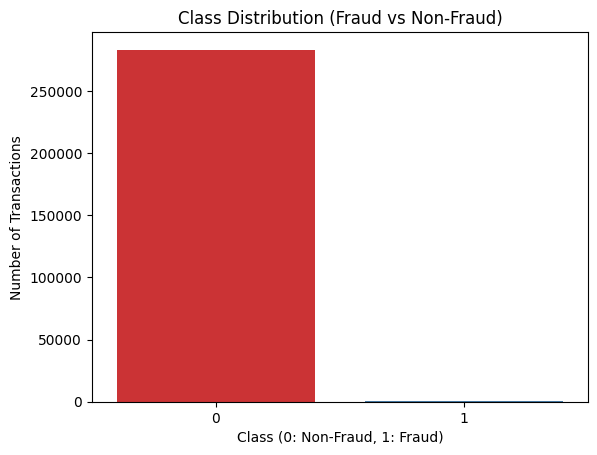

In [10]:
sns.countplot(x=df['Class'], palette='Set1')
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [11]:
df['Class'].value_counts() / df.shape[0]

Class
0    0.998333
1    0.001667
Name: count, dtype: float64

- we found that the dataset is imbalanced with a ratio of 99.73% is fraud to 0.27% is non-fraud
- we will use SMOTE to balance the dataset

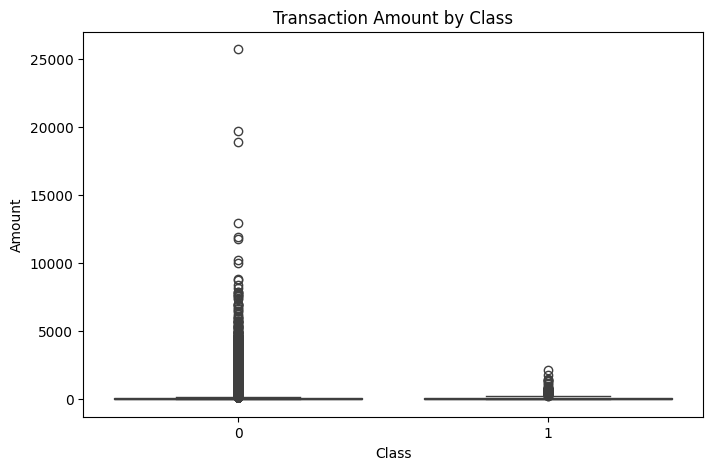

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df )
plt.title("Transaction Amount by Class")
plt.show()

- Hundel outliers 

In [13]:
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['Amount'] > lower_bound) & (df['Amount'] < upper_bound)]

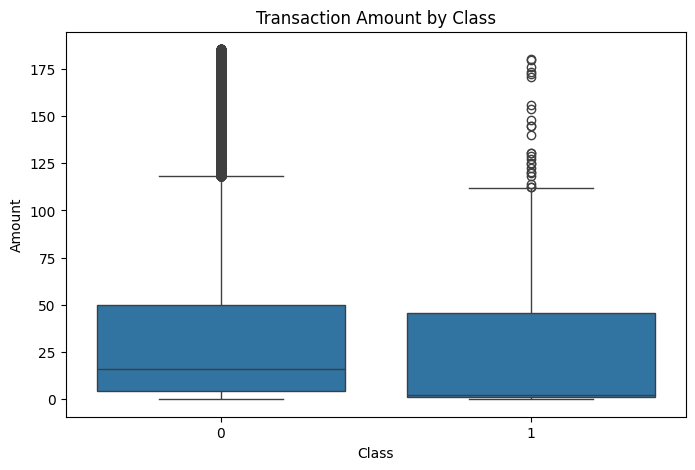

In [93]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df )
plt.title("Transaction Amount by Class")
plt.show()

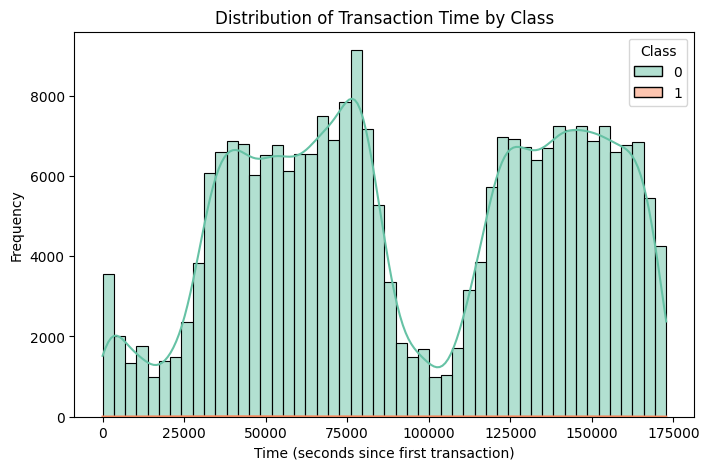

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Time', bins=50, kde=True, hue='Class', palette='Set2')
plt.title("Distribution of Transaction Time by Class")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()

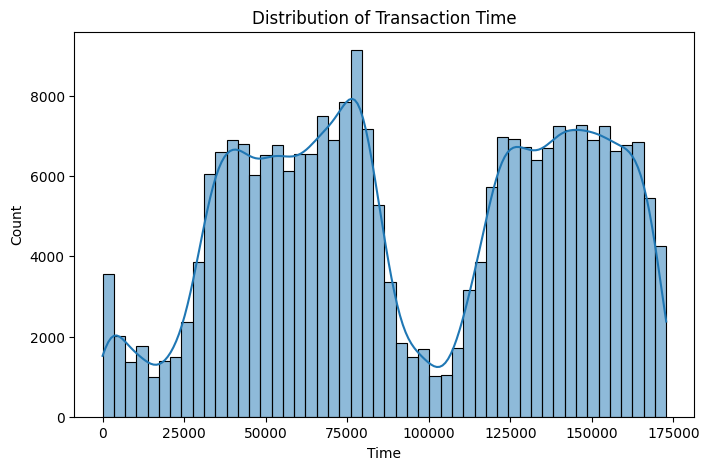

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Distribution of Transaction Time")
plt.show()

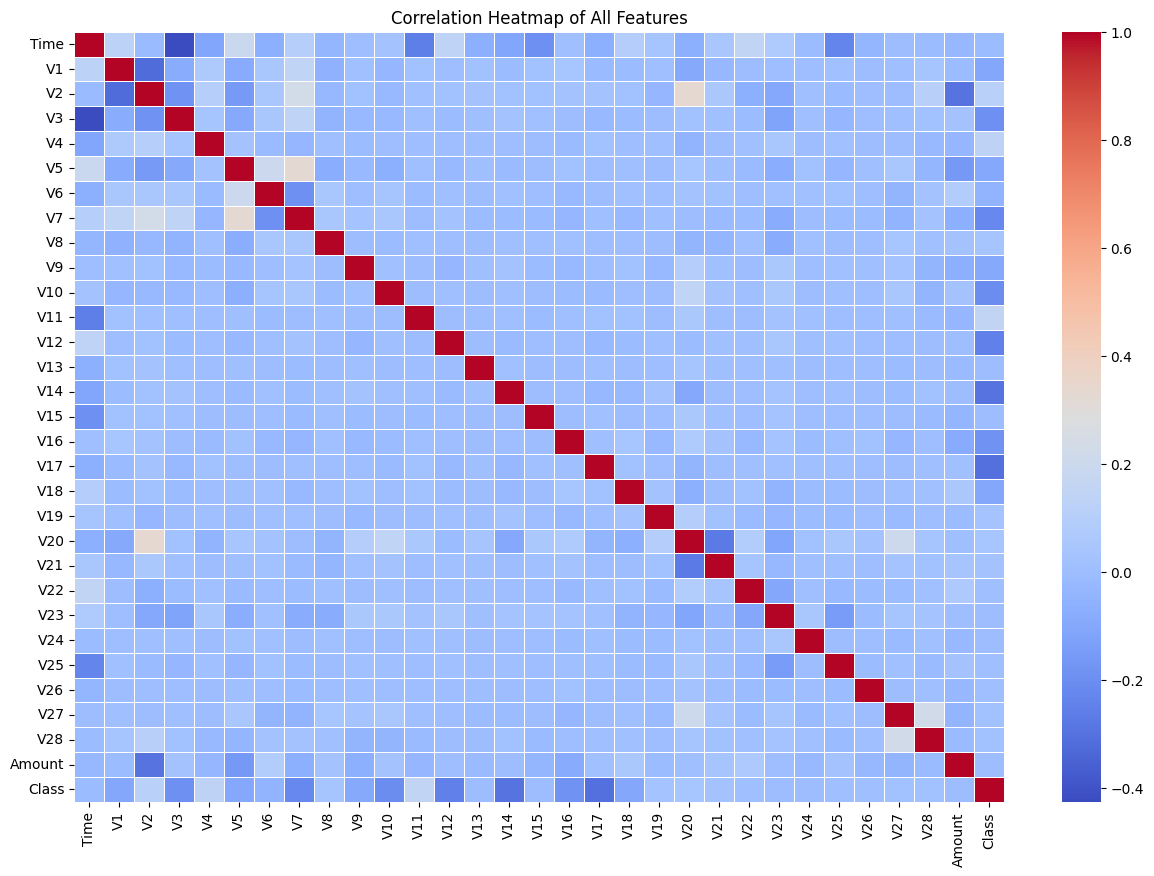

In [96]:
corr_matrix = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.show()


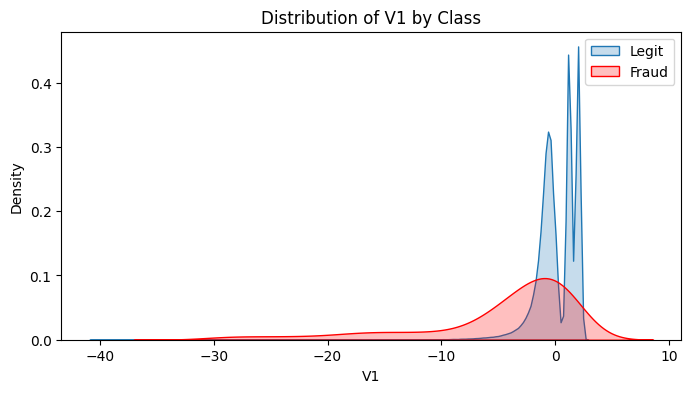

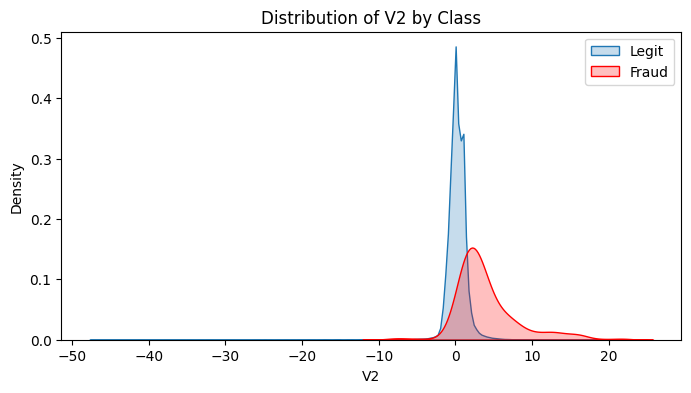

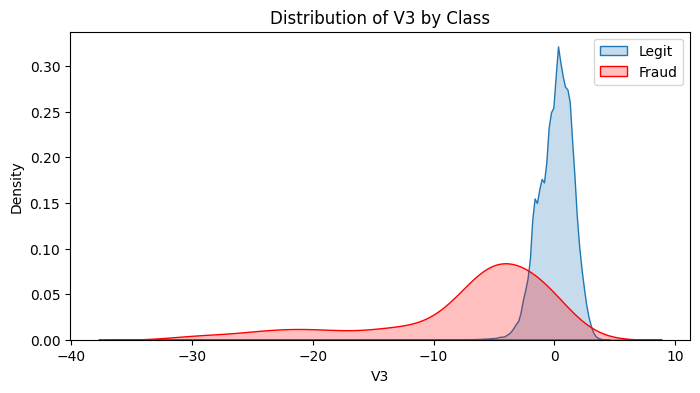

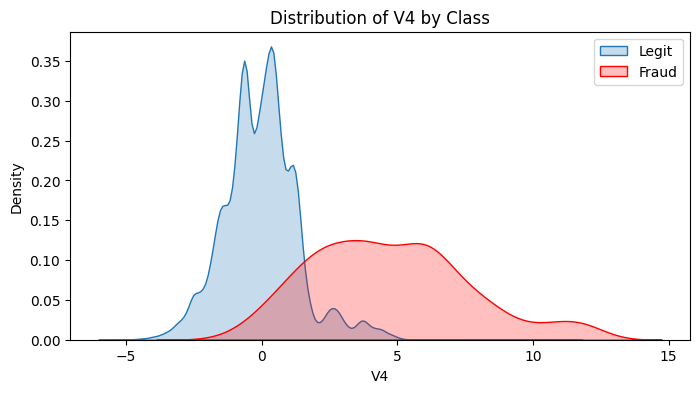

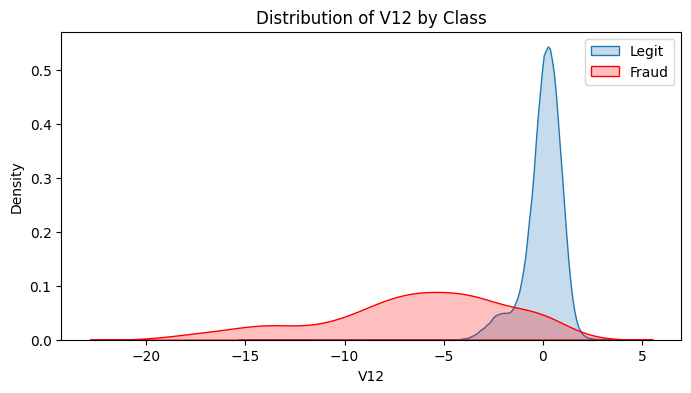

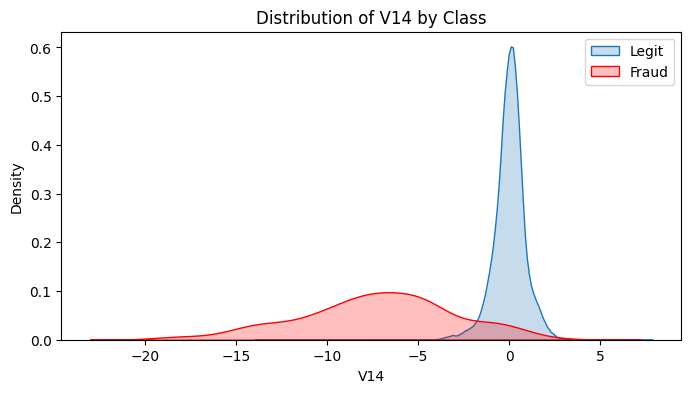

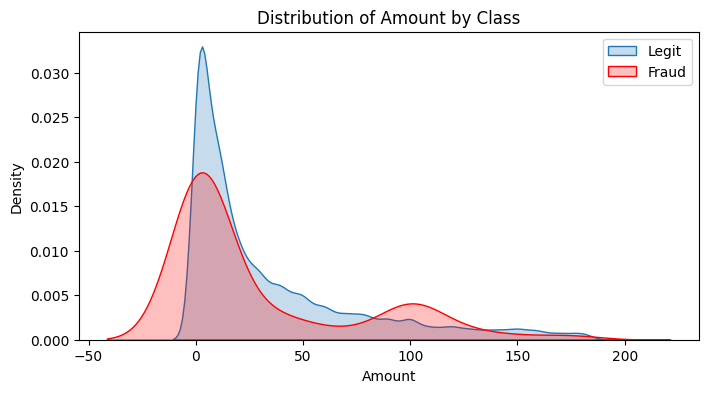

In [97]:
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V12', 'V14', 'Amount']

for col in features_to_plot:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df[df['Class']==0], x=col, label='Legit', shade=True)
    sns.kdeplot(data=df[df['Class']==1], x=col, label='Fraud', shade=True, color='r')
    plt.title(f"Distribution of {col} by Class")
    plt.legend()
    plt.show()


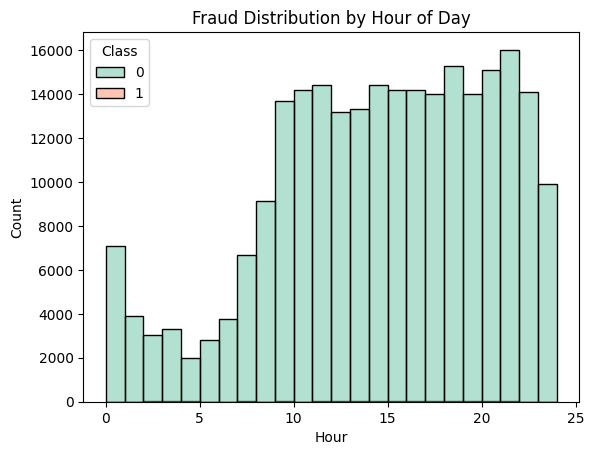

In [98]:
df['Hour'] = (df['Time'] / 3600) % 24
sns.histplot(data=df, x='Hour', hue='Class', bins=24, kde=False, palette='Set2')
plt.title("Fraud Distribution by Hour of Day")
plt.show()

# Features and Target

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [102]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = ExtraTreesClassifier()
model4 = BaggingClassifier()
model5 = AdaBoostClassifier()
model6 = SVC()
model7 = XGBClassifier()

In [103]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model 


In [104]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return y_pred, accuracy, report

In [105]:
def model_pipeline(model_name, model, X_train, y_train, X_test, y_test):
    print(f"\n{'='*20} {model_name} {'='*20}")
    trained_model = train_model(model, X_train, y_train)
    y_pred, acc, report = test_model(trained_model, X_test, y_test)
    print(f"Accuracy:  {acc:.4f}")
    print("Classification Report:\n", report)
    filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(trained_model, file)
    print(f"Model saved as: {filename}")
    return {
        "Model": model_name,
        "Accuracy": acc,
    }

In [106]:
model_pipeline("Logistic Regression", model1, X_train, y_train, X_test, y_test)


==================== Logistic Regression ====================
Accuracy:  0.9751
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     50331
           1       0.98      0.97      0.97     50331

    accuracy                           0.98    100662
   macro avg       0.98      0.98      0.98    100662
weighted avg       0.98      0.98      0.98    100662

Model saved as: logistic_regression_model.pkl


{'Model': 'Logistic Regression', 'Accuracy': 0.9750948719477062}

In [108]:
model_pipeline("Random Forest", model2, X_train, y_train, X_test, y_test)


==================== Random Forest ====================
Accuracy:  0.9999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50331
           1       1.00      1.00      1.00     50331

    accuracy                           1.00    100662
   macro avg       1.00      1.00      1.00    100662
weighted avg       1.00      1.00      1.00    100662

Model saved as: random_forest_model.pkl


{'Model': 'Random Forest', 'Accuracy': 0.999890723411019}

In [109]:
model_pipeline("Extra Trees", model3, X_train, y_train, X_test, y_test)


==================== Extra Trees ====================
Accuracy:  0.9999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50331
           1       1.00      1.00      1.00     50331

    accuracy                           1.00    100662
   macro avg       1.00      1.00      1.00    100662
weighted avg       1.00      1.00      1.00    100662

Model saved as: extra_trees_model.pkl


{'Model': 'Extra Trees', 'Accuracy': 0.9999006576463809}

In [110]:
model_pipeline("Bagging", model4, X_train, y_train, X_test, y_test)


==================== Bagging ====================
Accuracy:  0.9995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50331
           1       1.00      1.00      1.00     50331

    accuracy                           1.00    100662
   macro avg       1.00      1.00      1.00    100662
weighted avg       1.00      1.00      1.00    100662

Model saved as: bagging_model.pkl


{'Model': 'Bagging', 'Accuracy': 0.9995430251733524}

In [111]:
model_pipeline("AdaBoost", model5, X_train, y_train, X_test, y_test)


==================== AdaBoost ====================
Accuracy:  0.9766
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     50331
           1       0.98      0.97      0.98     50331

    accuracy                           0.98    100662
   macro avg       0.98      0.98      0.98    100662
weighted avg       0.98      0.98      0.98    100662

Model saved as: adaboost_model.pkl


{'Model': 'AdaBoost', 'Accuracy': 0.9766048757227156}

In [ ]:
# model_pipeline("Support Vector Machine", model6, X_train, y_train, X_test, y_test)


==================== Support Vector Machine ====================


# Nural Network Model

In [18]:
model = Sequential (
    [
        Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8700 - loss: 3.9782 - val_accuracy: 0.9507 - val_loss: 0.2747
Epoch 2/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9464 - loss: 0.5546 - val_accuracy: 0.9735 - val_loss: 0.0752
Epoch 3/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9565 - loss: 0.1445 - val_accuracy: 0.9635 - val_loss: 0.1120
Epoch 4/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.9583 - loss: 0.1289 - val_accuracy: 0.9516 - val_loss: 0.1340
Epoch 5/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9663 - loss: 0.1036 - val_accuracy: 0.9748 - val_loss: 0.0735
Epoch 6/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9605 - loss: 0.1254 - val_accuracy: 0.9729 - val_loss: 0.0782
Epoch 7/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9660 - loss: 0.1070 - val_accuracy: 0.9749 - val_loss: 0.0721
Epoch 8/10
12583/12583 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 

In [21]:
model.evaluate(X_test, y_test)

3146/3146 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - accuracy: 0.9774 - loss: 0.0669


[0.06694070249795914, 0.9774095416069031]

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457 (5.70 KB)

 Trainable params: 485 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 972 (3.80 KB)

In [23]:
model.save("credit_card_fraud_detection_model.h5")